In [1]:
pip install pandas numpy scikit-learn xgboost deap


C:\Users\test\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\test\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Accuracy: 0.998046506845794
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     53863
           1       1.00      1.00      1.00    179565

    accuracy                           1.00    233428
   macro avg       1.00      1.00      1.00    233428
weighted avg       1.00      1.00      1.00    233428



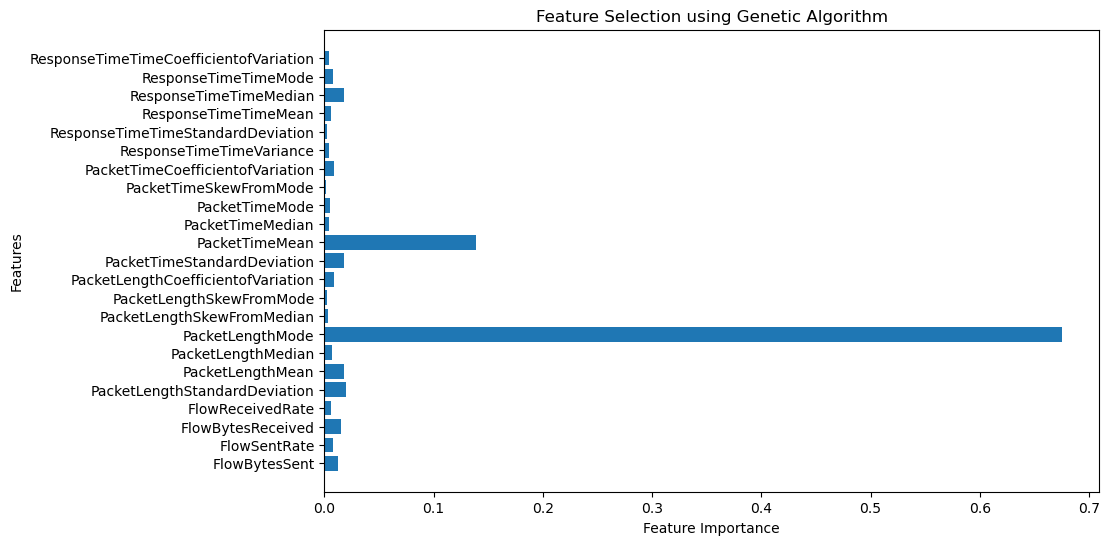

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load datasets
df1 = pd.read_csv('l1-doh.csv')
df2 = pd.read_csv('l1-nondoh.csv')

# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# Drop unnecessary columns
df.drop(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp'], axis=1, inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm for Feature Selection
def genetic_feature_selection(X_train, y_train, n_pop=50, n_gen=20):
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    creator.create('Individual', list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register('attr_bool', np.random.randint, 0, 2)
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)

    def eval_individual(individual):
        mask = np.array(individual, dtype=bool)
        if np.sum(mask) == 0:
            return 0,
        X_selected = X_train.iloc[:, mask]
        model = XGBClassifier(eval_metric='logloss')
        model.fit(X_selected, y_train)
        accuracy = model.score(X_selected, y_train)
        return accuracy,

    toolbox.register('mate', tools.cxTwoPoint)
    toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
    toolbox.register('select', tools.selTournament, tournsize=3)
    toolbox.register('evaluate', eval_individual)

    population = toolbox.population(n=n_pop)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_gen, verbose=False)
    best_individual = tools.selBest(population, k=1)[0]
    return np.array(best_individual, dtype=bool)

best_features = genetic_feature_selection(X_train, y_train)
X_train_selected = X_train.iloc[:, best_features]
X_test_selected = X_test.iloc[:, best_features]

# Train the model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the feature selection
selected_features = X_train.columns[best_features]
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Selection using Genetic Algorithm')
plt.show()


Number of Features Selected: 20
Accuracy: 0.9980979145603783
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     53863
           1       1.00      1.00      1.00    179565

    accuracy                           1.00    233428
   macro avg       1.00      1.00      1.00    233428
weighted avg       1.00      1.00      1.00    233428

False Negatives: 101
False Positives: 343


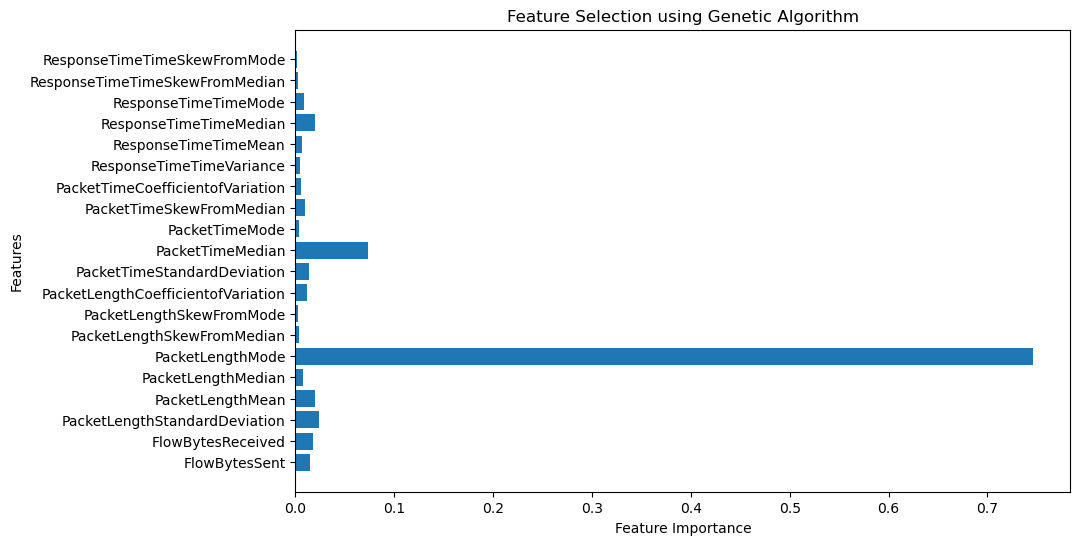

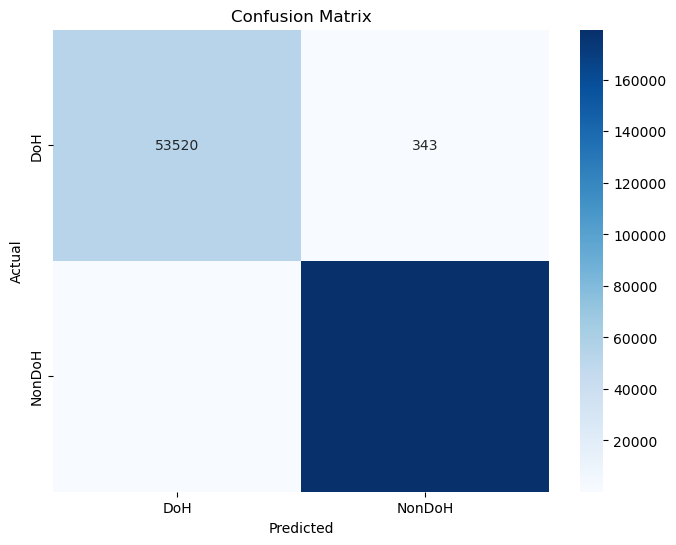

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv('l1-doh.csv')
df2 = pd.read_csv('l1-nondoh.csv')

# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# Drop unnecessary columns
df.drop(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp'], axis=1, inplace=True)

# Encode labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm for Feature Selection
def genetic_feature_selection(X_train, y_train, n_pop=50, n_gen=20):
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    creator.create('Individual', list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register('attr_bool', np.random.randint, 0, 2)
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)

    def eval_individual(individual):
        mask = np.array(individual, dtype=bool)
        if np.sum(mask) == 0:
            return 0,
        X_selected = X_train.iloc[:, mask]
        model = XGBClassifier(eval_metric='logloss')
        model.fit(X_selected, y_train)
        accuracy = model.score(X_selected, y_train)
        return accuracy,

    toolbox.register('mate', tools.cxTwoPoint)
    toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
    toolbox.register('select', tools.selTournament, tournsize=3)
    toolbox.register('evaluate', eval_individual)

    population = toolbox.population(n=n_pop)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_gen, verbose=False)
    best_individual = tools.selBest(population, k=1)[0]
    return np.array(best_individual, dtype=bool)

best_features = genetic_feature_selection(X_train, y_train)
X_train_selected = X_train.iloc[:, best_features]
X_test_selected = X_test.iloc[:, best_features]

# Train the model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
false_negatives = conf_matrix[1, 0]
false_positives = conf_matrix[0, 1]

# Print results
print("Number of Features Selected:", np.sum(best_features))
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print(f"False Negatives: {false_negatives}")
print(f"False Positives: {false_positives}")

# Plot feature importance
selected_features = X_train.columns[best_features]
plt.figure(figsize=(10, 6))
plt.barh(selected_features, model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Selection using Genetic Algorithm')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
